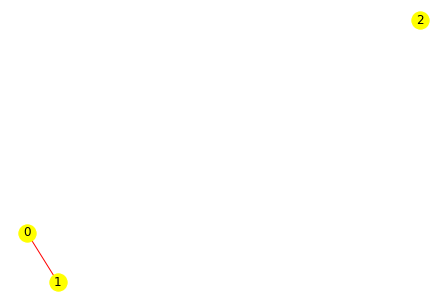

In [10]:
import numpy as np
import networkx as nx
K = np.loadtxt("test.csv", delimiter=",")
G = nx.to_networkx_graph(K)
nx.draw(G, with_labels=True, node_color='yellow', edge_color='red')

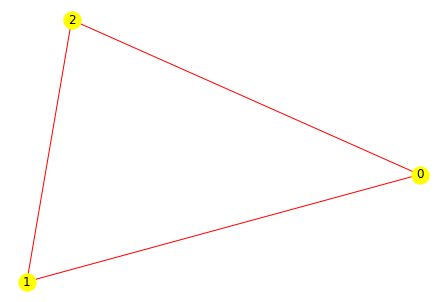

In [11]:
import numpy as np
import networkx as nx
K = np.loadtxt("test2.csv", delimiter=",")
G = nx.to_networkx_graph(K)
nx.draw(G, with_labels=True, node_color='yellow', edge_color='red')

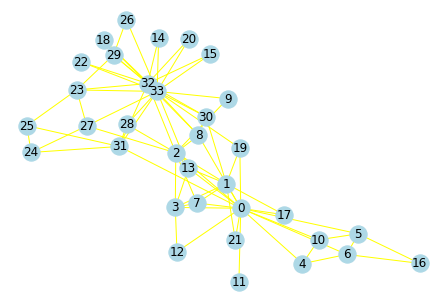

In [4]:
import networkx as nx
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='yellow')

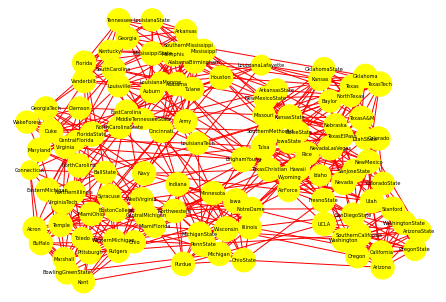

In [22]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import zipfile
zf = zipfile.ZipFile('football.zip')
txt = zf.read('football.txt').decode()
gml = zf.read('football.gml').decode()
gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)
plt.savefig('football.pdf')
degree = [d for n,d in G.degree()]
nx.draw(G, with_labels=True, node_size=[n*50 for n in degree], node_color='yellow', edge_color='red', font_size=5)

In [26]:
import pandas as pd
birddata = pd.read_csv('bird_tracking.csv')
birddata.columns
birddata.date_time[0:3]

ix = birddata.bird_name == "Sanne"
date = birddata.date_time[ix]
print(date[:1])

40916    2013-08-15 00:01:08+00
Name: date_time, dtype: object


In [37]:
import datetime as dt
import pandas as pd
birddata = pd.read_csv('bird_tracking.csv')
date_str = birddata.date_time[0]
dt.datetime.strptime(date_str[:-3], '%Y-%m-%d %H:%M:%S')
timestamps = []
for k in range(len(birddata)): timestamps.append(dt.datetime.strptime (birddata.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S'))
# timestamps
birddata['timestamp'] = pd.Series(timestamps, index = birddata.index)
birddata.timestamp[1] - birddata.timestamp[0]
birddata.index

RangeIndex(start=0, stop=61920, step=1)

In [41]:
import datetime as dt
import pandas as pd
birddata = pd.read_csv('bird_tracking.csv')
timestamps = []
for k in range(len(birddata)): timestamps.append(dt.datetime.strptime (birddata.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S'))
# timestamps
birddata['timestamp'] = pd.Series(timestamps, index = birddata.index)\

times = birddata.timestamp[birddata.bird_name == 'Eric']
elapsed = [time - times[0] for time in times]
elapsed[100]

Timedelta('1 days 05:24:41')

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
Name: speed_2d, dtype: float64


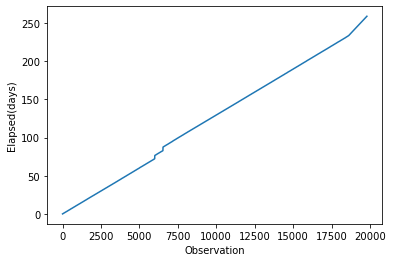

In [45]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

birddata = pd.read_csv('bird_tracking.csv')
timestamps = []
for k in range(len(birddata)): timestamps.append(dt.datetime.strptime (birddata.date_time.iloc[k][:-3], '%Y-%m-%d %H:%M:%S'))
# timestamps
birddata['timestamp'] = pd.Series(timestamps, index = birddata.index)\

times = birddata.timestamp[birddata.bird_name == 'Eric']
elapsed = [time - times[0] for time in times]
plt.plot(np.array(elapsed) / dt.timedelta(days=1))
plt.xlabel('Observation')
plt.ylabel('Elapsed(days)')
ix = birddata.bird_name == "Eric"
speed = birddata.speed_2d[ix]
print(speed.head())

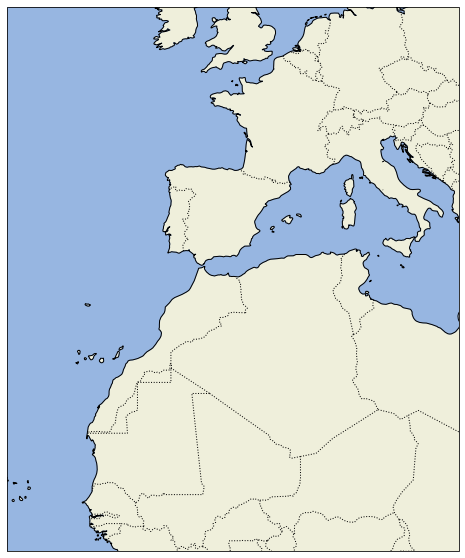

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

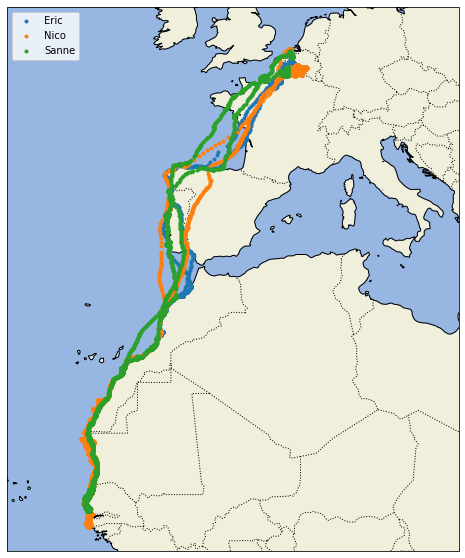

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

birddata = pd.read_csv('bird_tracking.csv')
bird_names = pd.unique(birddata.bird_name)

proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
    ix = birddata['bird_name'] == name
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform=ccrs.Geodetic(), label=name)
plt.legend(loc='upper left')

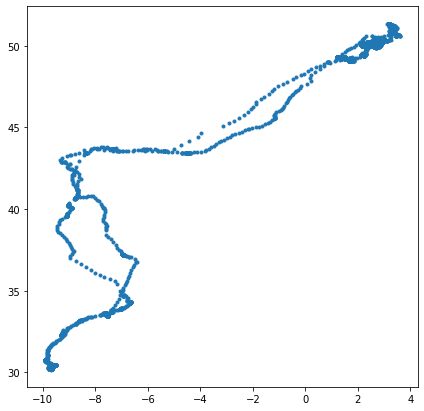

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

birddata = pd.read_csv('bird_tracking.csv')
ix = birddata.bird_name == "Eric"
x, y = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize=(7,7))
plt.plot(x, y, '.')

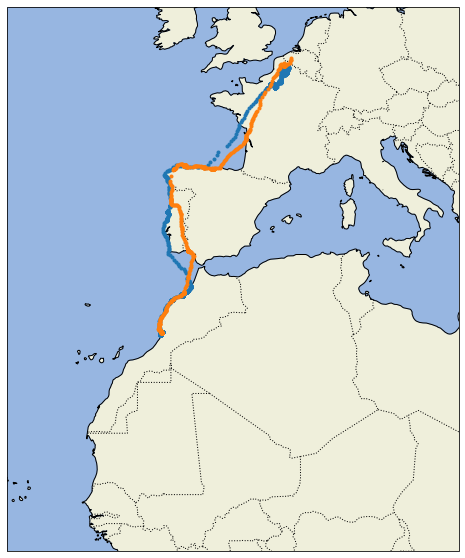

In [19]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

birddata = pd.read_csv('bird_tracking.csv')
bird_names = pd.unique(birddata.bird_name)

proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

ix = birddata['bird_name'] == 'Eric'
x, y = birddata.longitude[ix], birddata.latitude[ix]
ax.plot(x[0:17000], y[0:17000], '.', transform=ccrs.Geodetic());
ax.plot(x[17101:18600], y[17101:18600], '.', transform=ccrs.Geodetic());